# Density Profiles

Here we study the properties of the different desnity profiles that 
are usefull in galaxy formation theory, such as:

1. Plummer Profile
2. Hernquist Profile
3. Isothermal
4. NFW

# Plummer Profile:

The plumer density profile is one of the simplest models which describes
a constant density near the center and falls at large radii. 

$\Phi_P(r) = - \frac{GM}{\sqrt{r^2+a^2}}$

The scale length set the length $a$ in which the mayority of the density is enclosed. Note
that if $a$ is cero the plummer potential would be exactly as the potential of a point mass. 
In the other hand if $a$ goes to infty the potential is rewpresenting a very extended mass source.
In other words the scale length set up the size of the volume in which the mass $M$ is enclosed.

We may use Poisson equation in order to find the the density profile of the Plummer potential. 

$\nabla ^2 \Phi_P(r) = 4 \pi G \rho_P(r)$

$\nabla ^2 \Phi_P(r) = \frac{1}{r^2}\frac{d}{dr} \left (  r^2 \frac{d\Phi_P(r)}{dr} \right)$

$\frac{d\Phi_P(r)}{dr} = -GM \frac{r}{(r^2 + a^2)^{3/2}} $

$\frac{d}{dr} \left(  r^2 \frac{d\Phi_P(r)}{dr} \right) = \frac{3GMa^2}{(r^2 + a^2)^{5/2}}$

$4 \pi G \rho_P(r) = \frac{3GMa^2}{(r^2 + a^2)^{5/2}}$

$\rho_P(r) = \frac{3M}{4 \pi} \frac{a^2}{(r^2 + a^2)^{5/2}} $

$\rho_P (r) = \frac{3M}{4\pi a^3} (1 + \frac{r^2}{a^2})^{-5/2}$

In order to get the mass we integrate over all the volume of radius $r'$

$M_P(<r) = 4 \pi \int_0^r r'^2\frac{3M}{4\pi a^3} (1 + \frac{r'^2}{a^2})^{-5/2} dr'$

$M_P(<r) = \frac{3M}{a^3} \left( \frac{a^4 r^3 \sqrt{r^2/a^2 + 1}}{3(r^2 + a^2)^2}  \right)$

$M_P(<r) = M \frac{r^3}{(a^2+r^2)^{3/2}}$

Finally a quantity of particular interest is the circular velocity which can be derived as follows:

If a test particle of mass $m$ is orbitating the extended mass $M$ then in order to be in equilibrium
the gravitational force $F_g$ must be equal to the centripetal force.

$F_g = \frac{GmM}{r^2} = ma_c = m \frac{v_c^2}{r}$

$v_c = \sqrt{\frac{GM(<r)}{r}} $

$v_c = \sqrt{GM(\frac{r^2}{(r^2+a^2)^{3/2}})}$

In [1]:
%pylab inline
from astropy import constants
from astropy import units 
font = {'size':15, 'family':'serif'}
matplotlib.rc('font', **font)
from profiles import *

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:758: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now '/home/ngaravito/.config'/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [4]:
G1 = constants.G
K = constants.k_B
#print G
#print K
G1 = G1.to(units.kiloparsec**3 / (units.Msun * units.s**2)) 
K = K.to(units.Msun * units.kpc**2 / (units.s**2 * units.Kelvin))
#print G
#print K
M = 1E12 #Msun
M = M*units.Msun
#print M
R = np.linspace(0, 25)
R = R*units.kpc

AttributeError: 'function' object has no attribute 'G'

In [6]:
def mass_plummer(a, r, M):
    a = a*units.kpc
    Mass = M*r**3 / (a**2 + r**2)**(3/2.)
    return Mass

def rho_plummer(a, r, M):
    a = a*units.kpc
    rho = 3*M / (4 *np.pi * a**3) * (1 + r**2/a**2)**(-5/2)
    return rho

def potential_plummer(a, r, M):
    a = a*units.kpc
    phi =  - G*M / np.sqrt(r**2 + a**2)
    return phi

def vc_plummer(a, r, M):
    a = a*units.kpc
    vc = np.sqrt(G*M*( r**2/(r**2 + a**2)**(3/2.)))
    vc = vc.to(units.km / units.s)
    return vc

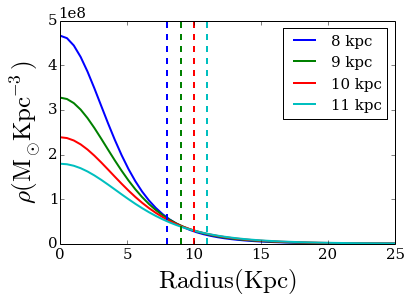

In [257]:
for i in range(8, 12):
    plot(R, rho_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
axvline(8, ls='--', lw=2, c='b')
axvline(9, ls='--', lw=2, c='g')
axvline(10, ls='--', lw=2, c='r')
axvline(11, ls='--', lw=2, c='c')
legend(fontsize=15)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=25)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=25)
#title('$\mathrm{Plummer\ Density\ profile}$', fontsize=25)
savefig('plummer_density.png', bbox_inches='tight')

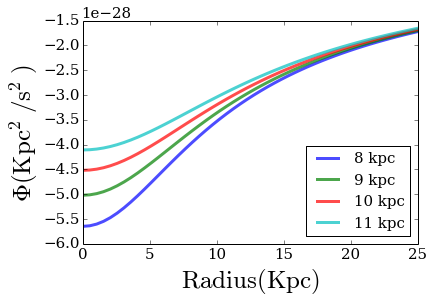

In [256]:
for i in range(8, 12):
    plot(R, potential_plummer(i, R, M), lw=3, label = str(i) + ' kpc', alpha=0.7)
legend(loc='best', fontsize=15)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=25)
ylabel('$\mathrm{\Phi(Kpc^2/s^2)}$', fontsize=25)
#title('$\mathrm{Plummer\ Potential\ profile}$', fontsize=25)
savefig('plummer_phi.png', bbox_inches='tight')

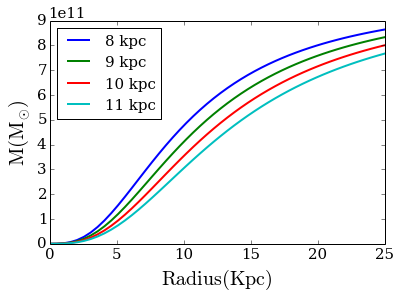

In [74]:
for i in range(8, 12):
    plot(R, mass_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
legend(loc='best', fontsize=15)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{M (M_\odot)}$', fontsize=20)
#title('$\mathrm{Plummer\ Mass\ Enclosed}$', fontsize=20)
savefig('plummer_mass.png', bbox_inches='tight')

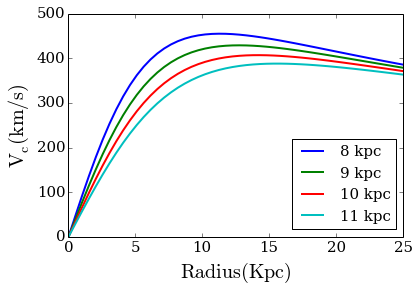

In [75]:
for i in range(8, 12):
    plot(R, vc_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
legend(loc='best', fontsize=15)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{V_c(km/s)}$', fontsize=20)
#title('$\mathrm{Plummer\ Potential\ profile}$', fontsize=20)
savefig('plummer_velocity.png', bbox_inches='tight')

# Hernquist Profile

$\Phi = - \frac{GM}{r+a}$

$\rho_{Hernquist}(r) =  \frac{M}{2\pi} \frac{a}{r(r+a)^3}$

$M_{Hernquist}(<r) = 2aM \int \frac{r}{(r+a)^3}dr $

$M_{Hernquist}(<r) = M \frac{r^2}{(r+a)^2}$

$v_c(r) = GM \frac{r}{(r+a)^2}$



In [5]:
def Potential_Hernquist(a, r, M):
    a = a*units.kpc
    phi = -G*M / (r+a)
    return phi

def Density_Hernquist(a, r, M):
    a = a*units.kpc
    rho = M / (2 * np.pi) * a / (r*(r+a)**3)
    return rho

def Mass_Hernquist(a, r, M):
    a = a*units.kpc
    Mass = M * r**2 / (r+a)**2
    return Mass

def vc_Hernquist(a, r, M):
    a = a*units.kpc
    vc = np.sqrt(G*M*r/(r+a)**2)
    vc = vc.to(units.km / units.s)
    return vc

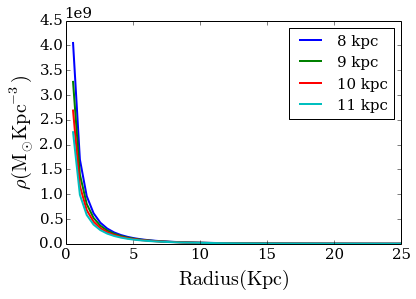

In [76]:
for i in range(8, 12):
    plot(R, Density_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
legend(loc='best', fontsize=15)
#title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)
savefig('hern_density.png', bbox_inches='tight')

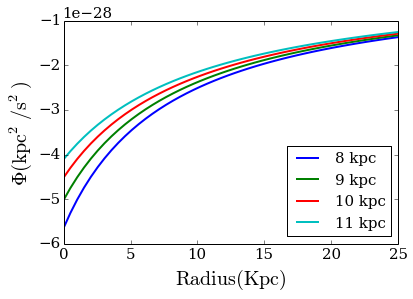

In [77]:
for i in range(8, 12):
    plot(R, Potential_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{\Phi(kpc^2/s^2)}$', fontsize=20)
legend(loc='best', fontsize=15)
#title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)
savefig('hern_potential.png', bbox_inches='tight')

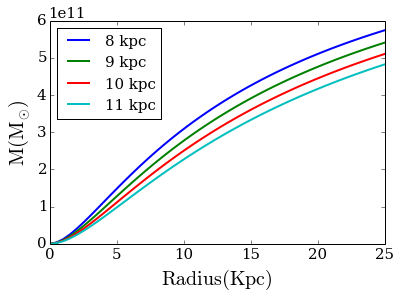

In [78]:
for i in range(8, 12):
    plot(R, Mass_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{M (M_\odot)}$', fontsize=20)
legend(loc='best', fontsize=15)
#title('$\mathrm{Hernquist\ Mass\ Enclosed}$', fontsize=20)
savefig('hern_mass.png', bbox_inches='tight')

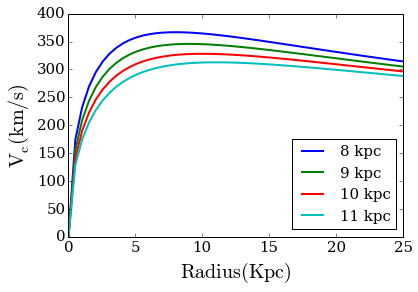

In [80]:
for i in range(8, 12):
    plot(R, vc_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{V_c(km/s)}$', fontsize=20)
legend(loc='best', fontsize=15)
#title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)
savefig('hern_velocity.png', bbox_inches='tight')

# Isothermal profile

$\rho = \dfrac{v^2}{4 \pi G (r^2 + a^2)} $

$M(r) = v^2 \dfrac{r}{G}$

$\Phi = v^2 Ln(r+a)$

$V_c = v \sqrt{(\dfrac{r+a}{r})}$

$a_c = - \dfrac{v^2}{(r+a)}$

In [2]:
def rho_sis(a, v, G, r):
    a = a*units.kpc
    v = v.to(units.kpc / units.s)
    rho = v**2 / (4*np.pi * G*(r**2 + a**2))
    return rho

def mass_sis(v, G, r):
    v = v.to(units.kpc / units.s)
    M = v**2 * r/G
    return M

def phi_sis(v, r):
    v = v.to(units.kpc / units.s)
    phi = -v**2 * log(r.value)
    return phi*units.kpc

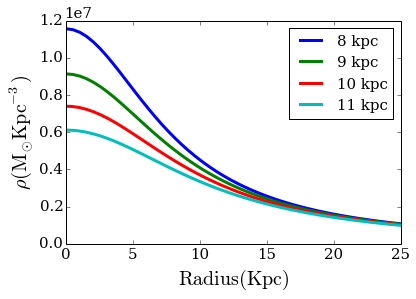

In [7]:
v = 200*units.km / units.s
for i in range(8, 12):
    plot(R, rho_sis(i, v, G, R), lw=3, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
legend(loc='best', fontsize=15)
#title('$\mathrm{SIS\ Density\ profile\ (v=200km/s)}$', fontsize=20)
savefig('sis_density.png', bbox_inches='tight')

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


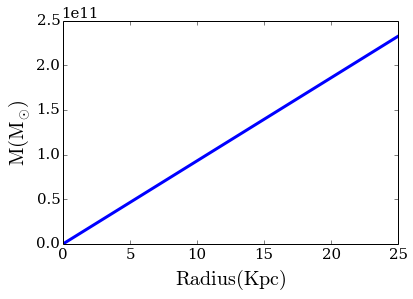

In [8]:
plot(R, mass_sis(v, G, R), lw=3)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{M (M_\odot)}$', fontsize=20)
legend(loc='best', fontsize=15)
#title('$\mathrm{SIS\ enclosed\ mass\ (v=200km/s)}$', fontsize=20)
savefig('sis_mass.png', bbox_inches='tight')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


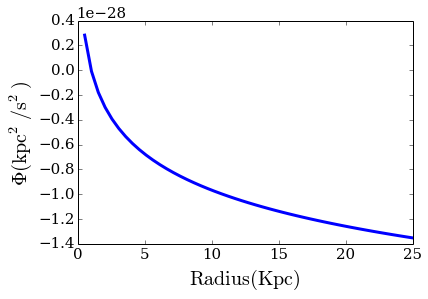

In [9]:
plot(R, phi_sis(v,  R), lw=3)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{\Phi(kpc^2/s^2)}$', fontsize=20)
#title('$\mathrm{SIS\ potential\ profile\ (v=200km/s)}$', fontsize=20)
savefig('sis_phi.png', bbox_inches='tight')

# NFW 

$\rho_{NFW}(r) = \frac{M}{4\pi a^3(r/a) (1 + r/a)^2}$

$M_{NFW}(r) = M  \left(  ln(1 + c) - \frac{c}{1 + c} \right)$

$\Phi_{NFW} = -G M \frac{ln(1 + r/a)}{r}$


$c = r_{vir}/a$

$c(M_{vir}) = 9.60  \left( \frac{M_{vir}}{10^{12}h^{-1}M_{\odot}} \right)^{-0.075}$ for halos at $z=0$ from Klypin et al 2011

$v_c(r) = \sqrt{\left(\dfrac{M(r)G}{r}\right)} = \sqrt{\left( \dfrac{G M  \left(  ln(1 + c) - \frac{c}{1 + c} \right)}{r} \right)}$

In [85]:
def rho_NFW(c, r, M, G):
    H_0 = 70*units.km / (units.s * units.Mpc)
    pcrit = rho_crit(G, 0, 0.27, H_0)
    rvir = (3* M / (360*pcrit*4*np.pi) )**(1/3.)
    rvir = rvir.to(units.kpc)
    a = rvir / c
    print a
    rho = M / ( 2*np.pi*a**3 *(r/a)*(1 + r/a)**2 )
    return rho

def mass_NFW(c, r, M, G):
    H_0 = 70*units.km / (units.s * units.Mpc)
    pcrit = rho_crit(G, 0, 0.27, H_0)
    rvir = (3* M / (360*pcrit*4*np.pi) )**(1/3.)
    rvir = rvir.to(units.kpc)
    a = rvir / c
    M = 2*M *(log(1 + r/a) - (r/a)/(1 + (r/a)))
    return M

def phi_NFW(c, r, M, G):
    H_0 = 70*units.km / (units.s * units.Mpc)
    pcrit = rho_crit(G, 0, 0.27, H_0)
    rvir = (3* M / (360*pcrit*4*np.pi) )**(1/3.)
    rvir = rvir.to(units.kpc)
    a = rvir / c
    phi = - 4 * np.pi * G * M * log( 1 + r/a) / r
    return phi

def vc_NFW(c, r, M, G):
    H_0 = 70*units.km / (units.s * units.Mpc)
    pcrit = rho_crit(G, 0, 0.27, H_0)
    rvir = (3* M / (360*pcrit*4*np.pi) )**(1/3.)
    rvir = rvir.to(units.kpc)
    a = rvir / c
    print a
    vc = np.sqrt( ( M*G* (log(1 + r.value/a.value) - (r/a) / (1 + r/a)) )/r )
    vc = vc.to(units.km / units.s)
    return vc

21.1989543127 kpc
18.8435149447 kpc
16.9591634502 kpc
15.4174213184 kpc


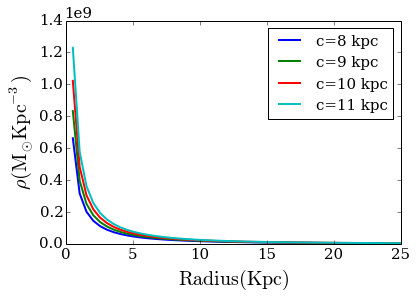

In [92]:
for i in range(8, 12):
    plot(R, rho_NFW(i, R, M, G), lw=2, label = 'c=' +str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
legend(loc='best', fontsize=15)
#title('$\mathrm{NFW\ Density\ profile}$', fontsize=20)
savefig('NFW_density.png', bbox_inches='tight')

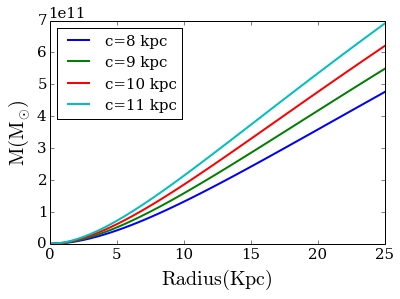

In [93]:
for i in range(8, 12):
    plot(R, mass_NFW(i, R, M, G), lw=2, label = 'c=' + str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{M (M_\odot)}$', fontsize=20)
legend(loc='best', fontsize=15)
#title('$\mathrm{NFW\ Enclosed\ Mass}$', fontsize=20)
savefig('NFW_mass.png', bbox_inches='tight')

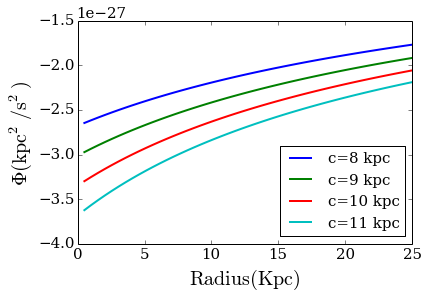

In [95]:
for i in range(8, 12):
    plot(R, phi_NFW(i, R, M, G), lw=2, label = 'c=' + str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\Phi (kpc^2/s^2)}$', fontsize=20)
legend(loc='best', fontsize=15)
#title('$\mathrm{NFW\ Potential}$', fontsize=20)
savefig('NFW_potential.png', bbox_inches='tight')

21.1989543127 kpc
18.8435149447 kpc
16.9591634502 kpc
15.4174213184 kpc


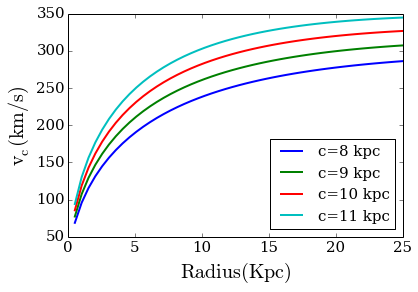

In [96]:
for i in range(8, 12):
    plot(R, vc_NFW(i, R, M, G), lw=2, label = 'c=' + str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{v_c (km/s)}$', fontsize=20)
legend(loc='best', fontsize=15)
#title('$\mathrm{NFW\ circular\ velocity}$', fontsize=20)
savefig('NFW_vc.png', bbox_inches='tight')

# Miyamoto - Nagai:

In [97]:
def MN_potential(a, b, G, M, r, z):
    z = z*units.kpc
    a = a*units.kpc
    b = b*units.kpc
    r = r*units.kpc
    phi = - G*M / (np.sqrt(r**2 + ( a + np.sqrt( z**2 + b**2 ))**2 ) )
    return phi.value

def MN_density(a, b, M, r, z):
    z = z*units.kpc
    a = a*units.kpc
    b = b*units.kpc
    r = r*units.kpc
    rho = (b**2 * M / (4*np.pi)) * (a*r**2 + ( a + 3*(np.sqrt(z**2 + b**2)))*( a + np.sqrt(z**2 + b**2))**2 ) /( ( (r**2 + (a + np.sqrt(z**2 + b**2))**2)**(5./2.) * (z**2 + b**2)**(3./2.)) )
    return rho.value


def MN_vc(a, b, G, M, r, z=0):
    z = z*units.kpc
    a = a*units.kpc
    b = b*units.kpc
    r = r*units.kpc
    vc = r*np.sqrt(G*M / ( (r**2 + (a + b)**2)**(3/2.0) ))
    return vc.value

<matplotlib.contour.QuadContourSet instance at 0x7f79b476b248>

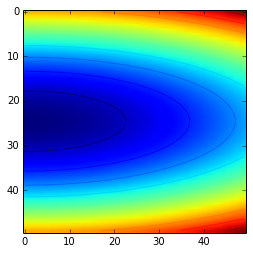

In [52]:
R=20.0
Z=10
r = linspace(0, R)
z = linspace(-Z, Z)
r, z = np.meshgrid(r/R, z/R)
phi = MN_potential(10, 1, G,  M, r, z)
imshow(phi)
contour(phi, 10)

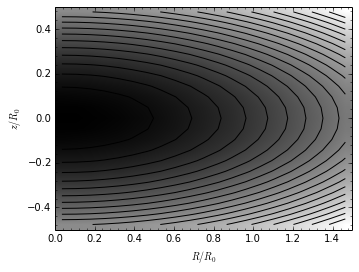

In [16]:
from galpy.potential import MiyamotoNagaiPotential
mp= MiyamotoNagaiPotential(a=10,b=1,normalize=0.6)
mp.plot()

In [69]:
print mp.dens(1, 1)

0.214892411637


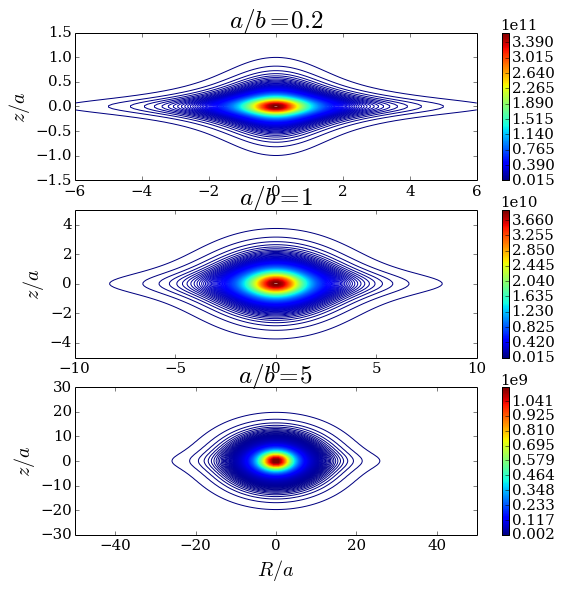

In [101]:
plt.figure(figsize=(9, 9))
R=6.0
Z=1.5 
a = 1.0
#print 0.3*M
r = linspace(-R/a, R/a, 100)
z = linspace(-Z, Z, 100)
r, z = np.meshgrid(r/a, z/a)
rho = MN_density(a, 0.2, M, r, z)
#imshow(rho)
plt.subplot(3, 1, 1)
CS = contour(r, z, rho, 300, lw=10, c='k')
colorbar()
#xlabel("$R/a$", fontsize=20)
ylabel("$z/a$", fontsize=20)
title('$a/b=0.2$', fontsize=25)


plt.subplot(3, 1, 2)
R= 10.
Z = 5
r = linspace(-R/a, R/a, 100)
z = linspace(-Z, Z, 100)
r, z = np.meshgrid(r/a, z/a)
rho = MN_density(a, 1.0, M, r, z)
CS = contour(r, z, rho, 300, lw=10, c='k', label='$a/b=1$')
colorbar()
legend(loc='best')
ylabel("$z/a$", fontsize=20)
title('$a/b=1$', fontsize=25)


plt.subplot(3, 1, 3)
R= 50.
Z = 30.
r = linspace(-R/a, R/a, 100)
z = linspace(-Z, Z, 100)
r, z = np.meshgrid(r/a, z/a)
rho = MN_density(a, 5.0, M, r, z)
CS = contour(r, z, rho, 1000, lw=10, c='k')
colorbar()
xlabel("$R/a$", fontsize=20)
ylabel("$z/a$", fontsize=20)
title('$a/b=5$', fontsize=25)


savefig('MN_density_contours.png', bbox_inches='tight')

#xlim(15, 35)

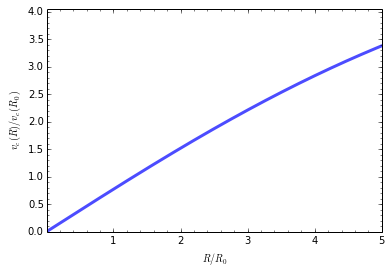

In [107]:
mp.plotRotcurve(lw=3, alpha=0.7)
#mp.plotRotcurve(Rrange=[0.01,1],grid=1001)
r = linspace(0, R)
#plot(r/4.0, MN_vc(10, 1, G, M, r, 0)/MN_vc(10, 1, G, M, 4.0, 0), c='r', alpha=0.7, lw=3)

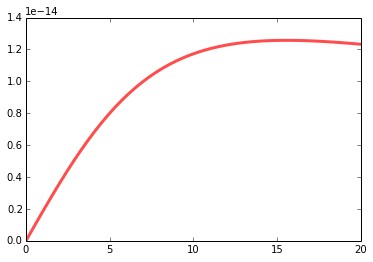

In [126]:
plot(r, MN_vc(10, 1, G, M, r, 0), c='r', alpha=0.7, lw=3)

# Logarithmic Profile

In [218]:
def Log_potential(R, v0, Rc, z, q):
    phi = 0.5 * v0**2 * log(Rc**2 + R**2 +  (z**2 / q**2) )
    return phi

def Log_vc(R, v0, Rc):
    vc = v0*R / (np.sqrt(Rc**2 + R**2))
    return vc

def Log_density(R, v0, Rc, z, G, q):
    rho = ( v0**2 / (4*np.pi*G*q**2) ) * ( ( (2*q**2 + 1)*Rc**2 + R**2 + (2 - q**-2)*z**2 ) / (Rc**2 + R**2 + ( z**2 / q**2) )**2  )
    return rho

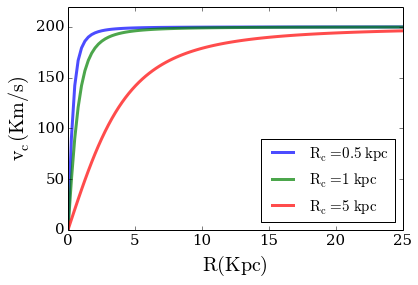

In [219]:
#plt.figure(figsize=(9, 7))
R = linspace(0, 25, 100)
vc1 = Log_vc(R, 200, 1)
vc2 = Log_vc(R, 200, 5)
vc3 = Log_vc(R, 200, 0.5)
plot(R, vc3, lw=3, alpha=0.7, label='$\mathrm{R_c = 0.5\ kpc}$')
plot(R, vc1, lw=3, alpha=0.7, label='$\mathrm{R_c = 1\ kpc}$')
plot(R, vc2, lw=3, alpha=0.7, label='$\mathrm{R_c = 5\ kpc}$')
legend(loc='best', fontsize=15)
xlabel('$\mathrm{R(Kpc)}$', fontsize=20)
ylabel('$\mathrm{v_c(Km/s)}$', fontsize=20)
ylim(0, 220)
savefig('Log_vc.png', bbox_inches='tight')


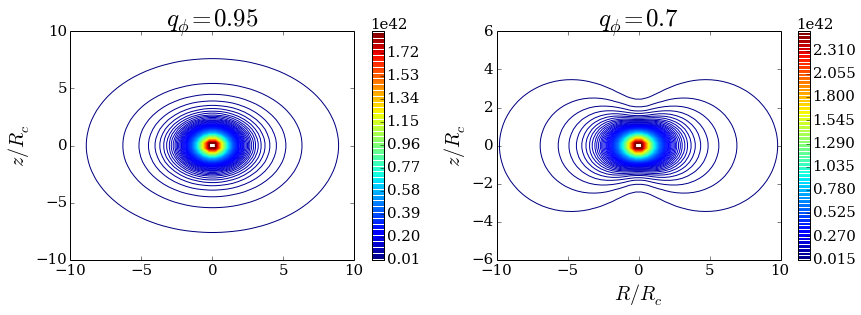

In [230]:
plt.figure(figsize=(14, 9))

plt.subplot(2, 2, 1)

Rc = 1
z = linspace(-10, 10)
R = linspace(-10, 10)
R, z = meshgrid(R, z)
v0 = 200
rho = Log_density(R, v0, Rc, z, G.value, 0.95)
CS = contour(R, z, rho, 200, lw=10, c='k')
colorbar()
ylabel("$z/R_c$", fontsize=20)
title('$q_{\phi}=0.95$', fontsize=25)

plt.subplot(2, 2, 2)
z = linspace(-6, 6)
R = linspace(-10, 10)
R, z = meshgrid(R, z)
v0 = 200
rho = Log_density(R, v0, Rc, z, G.value, 0.7)
CS = contour(R, z, rho, 200, lw=10, c='k')
colorbar()
title('$q_{\phi}=0.7$', fontsize=25)
xlabel("$R/R_c$", fontsize=20)
ylabel("$z/R_c$", fontsize=20)

savefig('MN_logarithmic_contours.png', bbox_inches='tight')







# Logarithmic profile (Law, Johnston & Majewski)

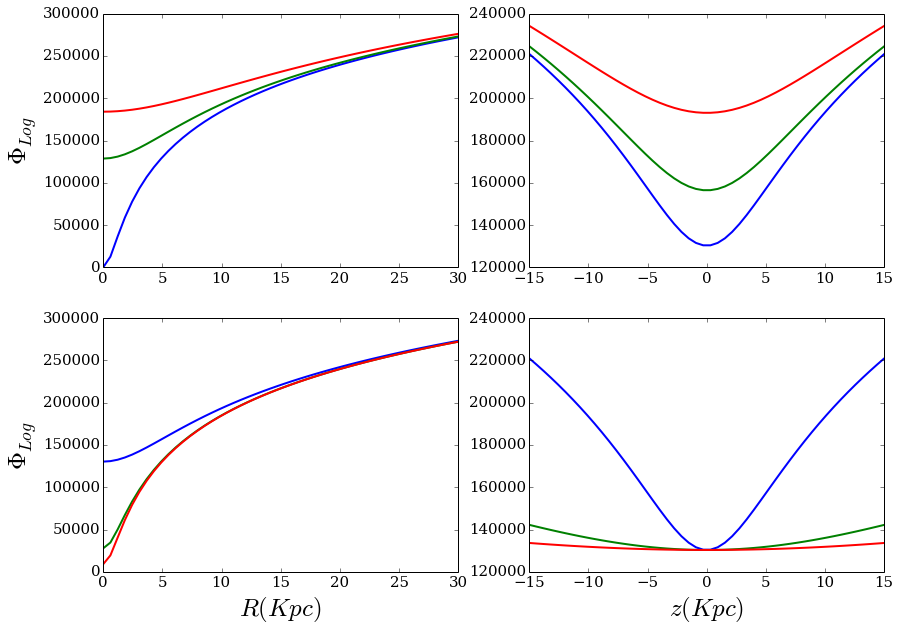

In [246]:
plt.figure(figsize=(14, 10))
r = linspace(0, 30)
z = linspace(-15, 15)
plt.subplot(2, 2, 1)
plot(r, Log_LJM_potential(r, 200, 1.0, 0, 1.0), lw=2)
plot(r, Log_LJM_potential(r, 200, 5.0, 0, 1.0), lw=2)
plot(r, Log_LJM_potential(r, 200, 10.0, 0, 1.0), lw=2)
ylabel('$\Phi_{Log}$', fontsize=25)


plt.subplot(2, 2, 2)
plot(z, Log_LJM_potential(5, 200, 1.0, z, 1.0), lw=2)
plot(z, Log_LJM_potential(5, 200, 5.0, z, 1.0), lw=2)
plot(z, Log_LJM_potential(5, 200, 10.0, z, 1.0), lw=2)

plt.subplot(2, 2, 3)
plot(r, Log_LJM_potential(r, 200, 1.0, 5, 1.0), lw=2)
plot(r, Log_LJM_potential(r, 200, 1.0, 5, 5.0), lw=2)
plot(r, Log_LJM_potential(r, 200, 1.0, 5, 10.0), lw=2)
xlabel('$R(Kpc)$', fontsize=25)
ylabel('$\Phi_{Log}$', fontsize=25)


plt.subplot(2, 2, 4)
plot(z, Log_LJM_potential(5, 200, 1.0, z, 1.0), lw=2)
plot(z, Log_LJM_potential(5, 200, 1.0, z, 5.0), lw=2)
plot(z, Log_LJM_potential(5, 200, 1.0, z, 10.0), lw=2)
xlabel('$z(Kpc)$', fontsize=25)



# logarithmic Profile (Law & Majewski )

In [58]:
def Log_LJM_potential(r, v0, d, z, q):
    phi =  v0**2 * log(r**2 +  (z**2 / q**2)  + d**2)
    return phi

def Log_LJM_vc(r, v0, d):
    vc = np.sqrt(2) * v0*r / (np.sqrt(d**2 + r**2))
    return vc

In [59]:
cos(90.0), cos(pi/2.0)

(-0.44807361612917013, 6.123233995736766e-17)

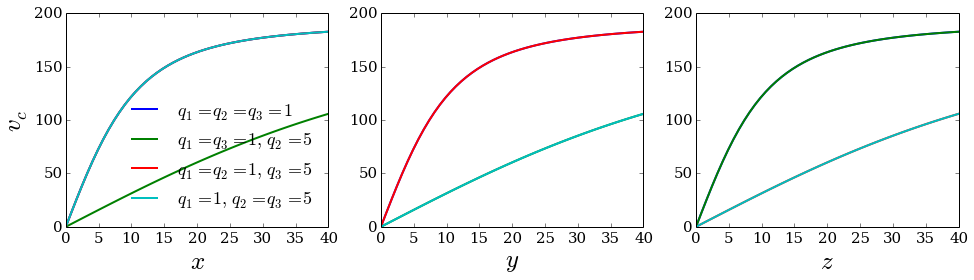

In [60]:
plt.figure(figsize=(16, 13))
x = linspace(0, 40)
y = linspace(0, 40)
z = linspace(0, 40)
r_halo  = 12

plt.subplot(3, 3, 1)
vc = vc_LMJ(r_halo, 1, 1, 1, 0,  x, 0, 0, 135)
plot(x, vc, label='$q_1 = q_2 = q_3 = 1$', lw=2)

vc = vc_LMJ(r_halo, 5, 1, 1, 0,  x, 0, 0, 135)
plot(x, vc, label='$q_1 = q_3 = 1,\ q_2 = 5$', lw=2)

vc = vc_LMJ(r_halo, 1, 1, 5, 0,  x, 0, 0, 135)
plot(x, vc, label='$q_1 = q_2 = 1,\ q_3 = 5$', lw=2)

vc = vc_LMJ(r_halo, 1, 5, 5, 0,  x, 0, 0, 135)
plot(x, vc, label='$q_1 = 1,\ q_2 = q_3 = 5$', lw=2)

plt.legend(loc='best', frameon = False)
plt.ylabel('$v_c$', fontsize=25)
plt.xlabel('$x$', fontsize=25)

plt.subplot(3, 3, 2)
vc = vc_LMJ(r_halo, 1, 1, 1, 0,  0, y, 0, 135)
plot(y, vc, lw=2)
vc = vc_LMJ(r_halo, 1, 5, 1, 0,  0, y, 0, 135)
plot(y, vc, lw=2)
vc = vc_LMJ(r_halo, 1, 1, 5, 0,  0, y, 0, 135)
plot(y, vc, lw=2)
vc = vc_LMJ(r_halo, 1, 5, 5, 0,  0, y, 0, 135)
plot(y, vc, label='$q_1 = 1,\ q_2 = q_3 = 5$', lw=2)
plt.xlabel('$y$', fontsize=25)

plt.subplot(3, 3, 3)
vc = vc_LMJ(r_halo, 1, 1, 1, 0,  0, 0, z, 135)
plot(z, vc, lw=2)
vc = vc_LMJ(r_halo, 1, 5, 1, 0,  0, 0, z, 135)
plot(z, vc, lw=2)
vc = vc_LMJ(r_halo, 1, 1, 5, 0,  0, 0, z, 135)
plot(z, vc, lw=2)
vc = vc_LMJ(r_halo, 1, 5, 5, 0,  0, 0, z, 135)
plot(z, vc, label='$q_1 = 1,\ q_2 = q_3 = 5$', lw=2)
plt.xlabel('$z$', fontsize=25)

In [86]:
def Log_LM_potential(x, y, z, r_halo, v0, phi, qz, q1, q2):
    c1 = ( (np.cos(phi)**2 / q1**2.0 ) +  ( np.sin(phi)**2.0 / q2**2.0 ) )
    c2 = ( (np.cos(phi)**2 / q2**2.0 ) +  ( np.sin(phi)**2.0 / q1**2.0 ) )
    c3 = 2.0* np.sin(phi) * np.cos(phi) * (  (1/q1**2.0)-  (1/q2**2.0) )
    Phi = v0**2.0 * log( (c1 * x**2.0) + (c2 * y**2.0) + (c3*x*y) +  (z/qz)**2.0 + r_halo**2.0) 
    return Phi

print Log_LM_potential(1, 1, 0, 12, 220, 0, 1, 1, 1)
print Log_LM_potential(1, 1, 0, 12, 220, 0, 1, 1.8, 1)
print Log_LM_potential(1, 1, 0, 12, 220, 0, 1, 1.0, 1.8)

241206.560491
240976.826206
240976.826206


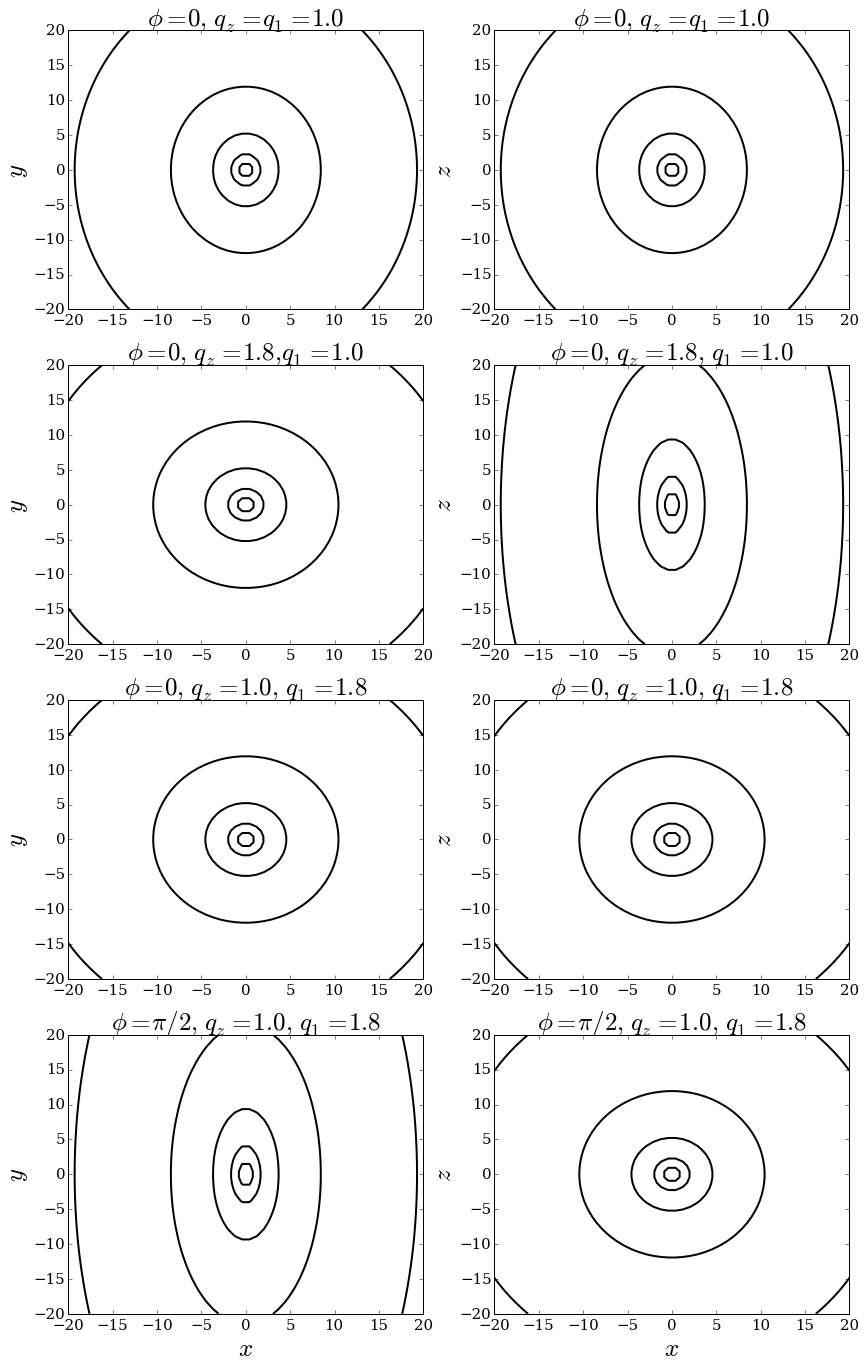

In [105]:
plt.figure(figsize=(14, 23))
x = linspace(-20, 20)
y = linspace(-20, 20)
z = linspace(-20, 20)
r_halo  = 0
x1, y1 = meshgrid(x, y)
x2, z2 = meshgrid(x, z)



plt.subplot(4, 2, 1)
plt.title('$\phi = 0,\ q_z = q_1 = 1.0$', fontsize=25)
#contour(x1, y1, Log_LM_potential(x1, y1, z, r_halo,220,  0.0, 1.0, 1, 1), 120,  linewidths=2.0)
contour(x1, y1, Log_LM_potential(x1, y1, z, r_halo,220,  0.0, 1.0, 1, 1), 5, colors='k', linewidths=2.0)

ylabel('$y$', fontsize=25)

plt.subplot(4, 2, 2)
plt.title('$\phi = 0,\ q_z = q_1 = 1.0$', fontsize=25)
#contour(x2, z2, Log_LM_potential(x2, y, z2, r_halo, 220,  0.0, 1.0, 1, 1), 120, linewidths=2.0)
contour(x2, z2, Log_LM_potential(x2, y, z2, r_halo, 220,  0.0, 1.0, 1, 1), 5, colors='k', linewidths=2.0)
ylabel('$z$', fontsize=25)

plt.subplot(4, 2, 3)
plt.title('$\phi = 0,\ q_z =1.8,  q_1 = 1.0$', fontsize=25)
#contour(x1, y1, Log_LM_potential(x1, y1, z, r_halo, 220,  0.0, 1.8, 1, 1), 120,linewidths=2.0)
contour(x1, y1, Log_LM_potential(x1, y1, z, r_halo, 220,  0.0, 1.8, 1, 1), 5, colors='k', linewidths=2.0)
ylabel('$y$', fontsize=25)

plt.subplot(4, 2, 4)
plt.title('$\phi = 0,\ q_z = 1.8,\ q_1 = 1.0$', fontsize=25)
contour(x2, z2, Log_LM_potential(x2, y, z2, r_halo, 220,  0.0, 1.8, 1, 1), 5,  linewidths=2.0, colors='k')
ylabel('$z$', fontsize=25)

plt.subplot(4, 2, 5)
plt.title('$\phi = 0,\ q_z = 1.0,\ q_1 = 1.8$', fontsize=25)
contour(x1, y1, Log_LM_potential(x1, y1, z, r_halo, 220,  0.0, 1.0, 1.8, 1.0), 5,  colors='k', linewidths=2.0)
ylabel('$y$', fontsize=25)

plt.subplot(4, 2, 6)
plt.title('$\phi = 0,\ q_z = 1.0,\  q_1 = 1.8$', fontsize=25)
contour(x2, z2, Log_LM_potential(x2, y, z2, r_halo, 220,  0.0, 1.0, 1.8, 1), 5,  colors='k', linewidths=2.0)
ylabel('$z$', fontsize=25)

plt.subplot(4, 2, 7)
plt.title('$\phi = \pi/2,\ q_z = 1.0,\ q_1 = 1.8$', fontsize=25)
contour(x1, y1, Log_LM_potential(x1, y1, z, r_halo, 220,  np.pi/2.0, 1.0, 1.8, 1.0), 5,  colors='k', linewidths=2.0)
xlabel('$x$', fontsize=25)
ylabel('$y$', fontsize=25)

plt.subplot(4, 2, 8)
plt.title('$\phi = \pi/2,\ q_z = 1.0,\  q_1 = 1.8$', fontsize=25)
contour(x2, z2, Log_LM_potential(x2, y, z2, r_halo, 220,  np.pi/2.0, 1.0, 1.8, 1), 5,  colors='k', linewidths=2.0)
xlabel('$x$', fontsize=25)
ylabel('$z$', fontsize=25)

#savefig('triaxial_potential.png', bbox_inches='tight')


In [65]:
def vc_LMJ(x, y, z, r_halo, v, q1, q2, qz, phi):
    x = x * units.kpc
    y = y * units.kpc
    z = z * units.kpc
    r_halo = r_halo * units.kpc
    v = v * units.km / units.s
    c1 = ( (np.cos(phi)**2 / q1**2 ) +  ( np.sin(phi)**2 / q2**2 ) )
    c2 = ( (np.cos(phi)**2 / q2**2 ) +  ( np.sin(phi)**2 / q1**2 ) )
    c3 = 2 * np.sin(phi) * np.cos(phi) * (  (1/q1**2) -  (1/q2**2) )
    den =  c1*x**2 + c2*y**2 + c3*x*y + (z/qz)**2 + r_halo**2 
    num = (  (2*c1*x + c3*y)**2 + (2*c2*y + c3*x)**2 + 4*z**2/qz**4  )**(1/2.)
    r = np.sqrt(x**2 + y**2 + z**2)
    vc = v*(np.sqrt(r * num / den) )
    return vc    

In [72]:
def v_param(Rsun, vsun, x, y, z, r_halo, q1, q2, qz, phi):
    Rsun = Rsun * units.kpc
    vsun = vsun * units.km / units.s
    x = x * units.kpc
    y = y * units.kpc
    z = z * units.kpc
    r_halo = r_halo * units.kpc
    #v = v * units.km / units.s
    c1 = ( (np.cos(phi)**2 / q1**2 ) +  ( np.sin(phi)**2 / q2**2 ) )
    c2 = ( (np.cos(phi)**2 / q2**2 ) +  ( np.sin(phi)**2 / q1**2 ) )
    c3 = 2 * np.sin(phi) * np.cos(phi) * (  (1/q1**2) -  (1/q2**2) )
    den =  c1*x**2 + c2*y**2 + c3*x*y + (z/qz)**2 + r_halo**2 
    num = (  (2*c1*x + c3*y)**2 + (2*c2*y + c3*x)**2 + 4*z**2/qz**4  )**(1/2.)
    v = vsun / ( np.sqrt(  Rsun * num /  den) ) 
    return v

In [73]:
v_param(8.0, 220.0, 8.0, 0.0, 0.0, 12.0, 1.0, 1.0, 1.0, 0.0)

<Quantity 280.4460732476031 km / s>

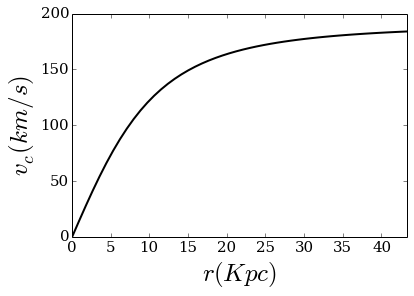

In [107]:
xvc = linspace(0, 25)
yvc = linspace(0, 25)
zvc = linspace(0, 25)
r = np.sqrt(xvc**2 + yvc**2 + zvc**2)
vc_LMJ(xvc, yvc, zvc, r_halo, 280, 1.0, 1.0, 1.0, 0.0)

plot(r,  vc_LMJ(xvc, yvc, zvc, r_halo, 135, 1.0, 1.0, 1.0, 0.0), c='k', lw=2)
ylim(0, 200)
xlim(0, max(r))
xlabel('$r(Kpc)$', fontsize=25)
ylabel('$v_c (km/s)$', fontsize=25)
savefig('vcLM10.png', bbox_inches='tight')

In [97]:
def M_LJ(x, y, z, r_halo, v, q1, q2, qz, phi, G):
    v = vc_LMJ(x, y, z, r_halo, v, q1, q2, qz, phi)
    v = v.to(units.kpc / units.s)
    r = (np.sqrt(x**2 + y**2 + z**2))
    r = r * units.kpc
    M = v**2 *  r / G
    print v**2, G
    M = M.to(units.Msun)
    return M
    

[  0.00000000e+00   8.88265376e-31   3.49648313e-30   7.66369467e-30
   1.31484382e-29   1.96614225e-29   2.68993747e-29   3.45737232e-29
   4.24305777e-29   5.02613680e-29   5.79055595e-29   6.52477975e-29
   7.22118620e-29   7.87533542e-29   8.48524105e-29   9.05071818e-29
   9.57283952e-29   1.00535049e-28   1.04951142e-28   1.09003284e-28
   1.12719001e-28   1.16125582e-28   1.19249335e-28   1.22115132e-28
   1.24746156e-28   1.27163801e-28   1.29387666e-28   1.31435600e-28
   1.33323800e-28   1.35066923e-28   1.36678200e-28   1.38169565e-28
   1.39551773e-28   1.40834512e-28   1.42026511e-28   1.43135637e-28
   1.44168982e-28   1.45132946e-28   1.46033307e-28   1.46875290e-28
   1.47663621e-28   1.48402581e-28   1.49096051e-28   1.49747556e-28
   1.50360299e-28   1.50937195e-28   1.51480900e-28   1.51993837e-28
   1.52478218e-28   1.52936068e-28] kpc2 / s2 4.51835939627e-39 kpc3 / (s2 solMass)


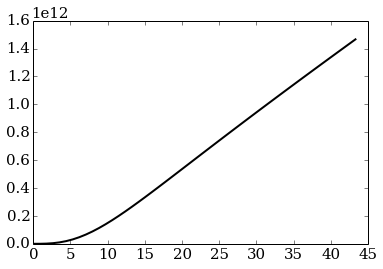

In [98]:
plot(r,  M_LJ(xvc, yvc, zvc, r_halo, 280, 1.0, 1.0, 1.0, 0.0, G), c='k', lw=2)

# Vera - Ciro

In [97]:
def pot_vh(v_h, d, ra, x, y, z, q1, q2, qz, q3, phi):
    x = x * units.kpc
    y = y * units.kpc
    z = z * units.kpc
    d = d * units.kpc
    ra = ra * units.kpc
    v_h = v_h * units.km / units.s
    v_h = v_h.to(units.kpc / units.s)
    c1 = ( (np.cos(phi)**2 / q1**2 ) +  ( np.sin(phi)**2 / q2**2 ) )
    c2 = ( (np.cos(phi)**2 / q2**2 ) +  ( np.sin(phi)**2 / q1**2 ) )
    c3 = 2 * np.sin(phi) * np.cos(phi) * (  (1/q1**2) -  (1/q2**2) )
    
    rA = np.sqrt( x**2 + y**2 + z**2/qz**2  )
    rT = np.sqrt(c1*x**2 + c2*y**2 + c3*x*y + z**2/q3**2)
    r = rA * (ra + rT) / (ra + rA)
    phi = v_h**2 * log(r.value**2 + d.value**2)
    return phi

In [114]:
x = linspace(-40, 40)
y = linspace(-40, 40)
z = linspace(-40, 40)
d = 12.0
qz = 0.9
q1 = 1.38
q2 = 1.0
q3 = 1.36
phi = 97 * np.pi / 180.0
v_h = 130.0
ra = 30

In [115]:
x1, y1 = meshgrid(x, y)
x2, z2 = meshgrid(x, z)
pot_vh(v_h, d, ra, x, y, z, q1, q2, qz, q3, phi)

<Quantity [  1.47631172e-28,  1.46266985e-28,  1.44848828e-28,
             1.43372371e-28,  1.41832767e-28,  1.40224570e-28,
             1.38541644e-28,  1.36777047e-28,  1.34922912e-28,
             1.32970291e-28,  1.30908999e-28,  1.28727435e-28,
             1.26412410e-28,  1.23949020e-28,  1.21320632e-28,
             1.18509149e-28,  1.15495863e-28,  1.12263559e-28,
             1.08801133e-28,  1.05113278e-28,  1.01239922e-28,
             9.72928971e-29,  9.35166305e-29,  9.03591545e-29,
             8.84709614e-29,  8.84709614e-29,  9.03591545e-29,
             9.35166305e-29,  9.72928971e-29,  1.01239922e-28,
             1.05113278e-28,  1.08801133e-28,  1.12263559e-28,
             1.15495863e-28,  1.18509149e-28,  1.21320632e-28,
             1.23949020e-28,  1.26412410e-28,  1.28727435e-28,
             1.30908999e-28,  1.32970291e-28,  1.34922912e-28,
             1.36777047e-28,  1.38541644e-28,  1.40224570e-28,
             1.41832767e-28,  1.43372371e-28,  1.448488

<matplotlib.contour.QuadContourSet instance at 0x7fa47ad5d200>

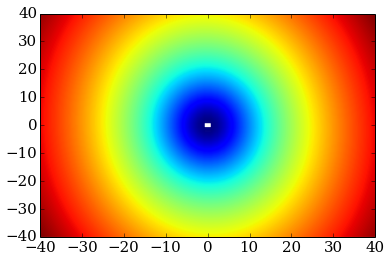

In [116]:
contour(x1, y1, pot_vh(v_h, d, ra, x1, y1, z, q1, q2, qz, q3, phi), 990)

# Virial Radius and Virial Mass

$\rho_{vir} = \frac{3M_{vir}}{4 \pi r_{vir}^3} = \Delta_{vir} \Omega_m \rho_{crit} $

$r_{vir} = \left( \frac{3M_{vir}}{4 \pi \Delta_{vir} \Omega_m \rho_{crit} } \right )^{1/3}$

$\Delta_{vir}=360$ from top hat model(Klypin et al 2011: http://arxiv.org/pdf/1002.3660v4.pdf)
at low z.

$\Omega_m = 0.27$

$\rho_{crit} = \frac{3H^2}{8\pi G}$

$H^2 = H_0^2 (\Omega_r a^{-4} + \Omega_m a^{-3} + \Omega_k a^{-2} + \Omega_{\Lambda})$

How you find r_vir?

In [6]:
def H(z, Omega0, H_0):
    Lambda0 = 1. - Omega0
    return H_0*(Omega0*(1+z)**3 - (Omega0+Lambda0-1)*(1+z)**2 + Lambda0)**0.5

def Omega_z(z,Omega0, H_0):
    return Omega0 * (1+z)**3 * (H_0/H(z,Omega0, H_0))**2

def rho_crit(G, z, Omega0, H_0):
    H2 = H(z, Omega0, H_0)**2
    rho = 3*H2 / (8*np.pi*G)
    return rho

In [7]:
H_0 = 70*units.km / (units.s * units.Mpc)# km/sMpc
print H_0 

H_0 = H_0.to(units.Mpc / (units.s * units.Mpc))

print H_0, G

70.0 km / (Mpc s)
2.26854550263e-18 1 / s 4.51835939627e-39 kpc3 / (s2 solMass)


In [8]:
pcrit = rho_crit(G, 0, 0.27, H_0)
print pcrit

135.955134016 solMass / kpc3


In [9]:
def rvir(Mvir, z):
    Mvir = Mvir * units.Msun
    G = constants.G
    G = G.to(units.kiloparsec**3 / (units.Msun * units.s**2)) 
    H_0 = 70*units.km / (units.s * units.Mpc)# km/sMpc
    H_0 = H_0.to(units.Mpc / (units.s * units.Mpc))
    Omega0 = 0.27
    Deltavir = 360
    pcrit = rho_crit(G, z, Omega0 , H_0)
    Rvir = ( 3*Mvir / (4 * np.pi * Deltavir * pcrit * Omega0) )**(1/3.)
    return Rvir

In [10]:
rvirt = rvir(1e12, 0)
print rvirt

AttributeError: 'function' object has no attribute 'G'

# $\Delta_{vir}$

 This comes up from the solutions for the 
 top hat model and can be expressed as:
 
 $\Delta_{vir} = 18 \pi^2 + 82x - 32x^2$
 where $x = \Omega_m(z) - 1$

In [5]:
def Dvir(z):
    H = 70
    Omega0 = 0.27
    Omegaz = Omega_z(z, Omega0, H)
    x = Omegaz - 1
    Deltavir =  ( (18*np.pi**2) +  (82*x) - 39*x**2 ) / Omegaz
    return Deltavir

In [6]:
Z = linspace(0, 10, 100)
Dv = Dvir(0)

NameError: global name 'Omega_z' is not defined

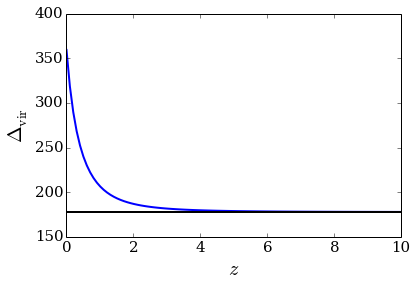

In [12]:
plot(Z, Dv, lw=2)
axhline(18*np.pi**2, lw=2, c='k')
xlabel('$z$', fontsize=20)
ylabel('$\mathrm{\Delta_{vir}}$', fontsize=20)
savefig('deltavir.png', bbox_inches = 'tight')

In [ ]:

# From rvir to r200